In [1]:
import sys; sys.path.insert(0, '..')
from dot_plots import *
import Merge_Cartesian as MC


plt.rcParams["figure.figsize"] = (7, 7)
%matplotlib widget

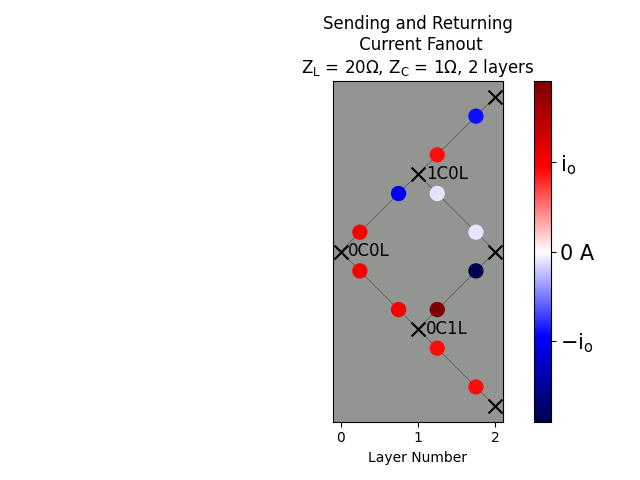

In [2]:
ax,fig = plot_sending_and_receiving('20','1',2,1,
                         False,
                         True,
                         True,'../plots/reflection_and_fanout/',True,False, True)



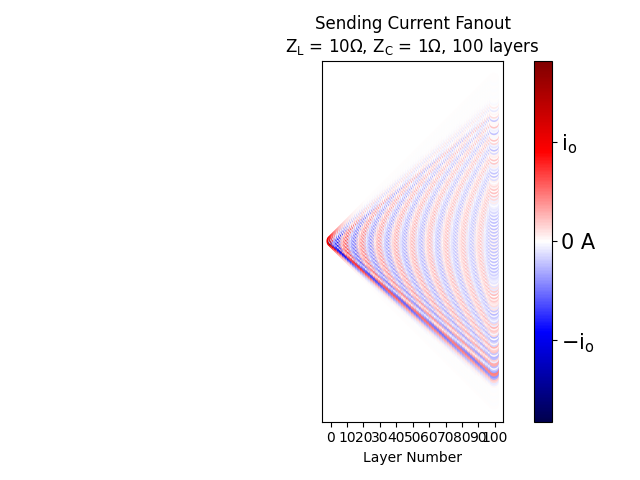

In [3]:
plot_sending_or_receiving('10','1',100,10,
                         False,
                         True,True,
                         False,'plots/')

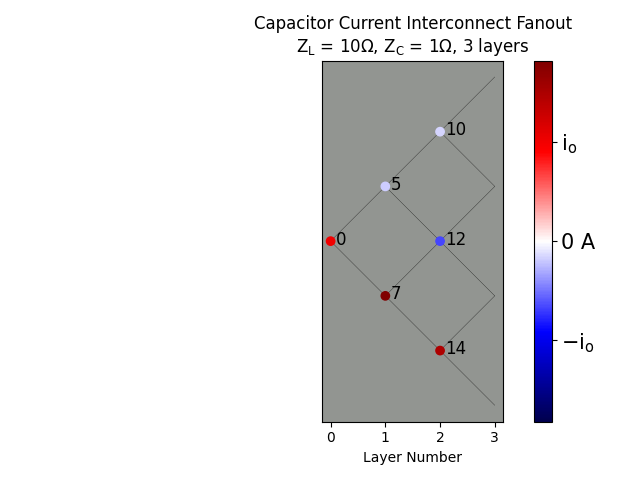

In [4]:
# plot_single_transmission('10','1',10,1,
#                          False,
#                          True,True,True,
#                          True,'plots/net/',False,True)
# plot_single_transmission('20','1',10,1,
#                          False,
#                          True,False,True,
#                          True,'plots/net/',False,True)
plot_interconnect('10','1',3,1,
                         False,
                         True,True,
                         False,'../plots/net/',False,True,False,True,True,'7','5')

val1 = True
val2 = True
val3 = True

for i in range (1,9):
    print(i,val1,val2,val3)
    plot_single_transmission('10','1',100,11,
                         False,
                         val1,val2,val3,
                         False,'plots/')
    
    val3 = not val3
    if i%2 == 0:
        val2 = not val2
        
    if i%4 == 0:
        val1 = not val1

In [5]:
L_Time = '7'
C_Time = '6'

L_impedance = '100'
C_impedance = '1'

L_Time_2 = '1'
C_Time_2 = '4'

L_impedance_2 = '50'
C_impedance_2 = '1'

number_periods = '2.5'

                 #  IMPEDANCE     ,TIME    ,LENGTH
Inductor_List =    [L_impedance   ,L_Time  ,'1']
Capacitor_List =   [C_impedance   ,C_Time  ,'1']
Inductor_List_2 =  [L_impedance_2 ,L_Time_2,'1']
Capacitor_List_2 = [C_impedance_2 ,C_Time_2,'1']

              #   VOLTAGE  , PERIODS       , BUCK , LOAD
Circuit_List =   ['1'      , number_periods, False, '12']
Circuit_List_2 = ['1'      , number_periods, False, '12']

(data_input,
data_output,
data_output_merged, 
data_output_ordered) = MC.Full_Cycle(Inductor_List,Capacitor_List, Circuit_List)

(data_input_2,
data_output_2,
data_output_merged_2, 
data_output_ordered_2) = MC.Full_Cycle(Inductor_List_2,Capacitor_List_2, Circuit_List_2)


Information about this network : 


- The Inductor -
Inductor Inductance Per Length :        350.0
Inductor Capacitance Per Length :       0.035
Inductor Length :                       1
Inductor Total Inductance :             350.0
Inductor Total Capacitance :            0.035
Inductor Velocity :                     0.2857142857142857142857142857
Inductor Time Delay :                   3.5
Inductor Impedance :                    100

- The Capacitor -
Capacitor Inductance Per Length :       3
Capacitor Capacitance Per Length :      3
Capacitor Length :                      1
Capacitor Total Inductance :            3
Capacitor Total Capacitance :           3
Capacitor Velocity :                    0.3333333333333333333333333333
Capacitor Time Delay :                  3
Capacitor Impedance :                   1

- The Time -
Number Periods :                        2.5
Simulation Stop Time :                  508.9961841984964877778550982
Number of Wavefronts :                  14964
Num

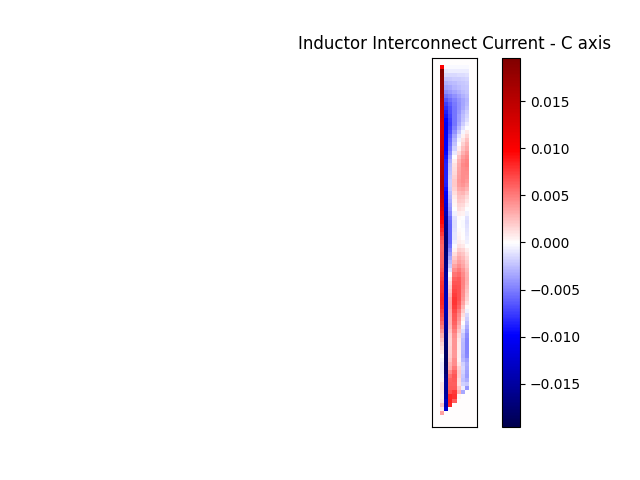

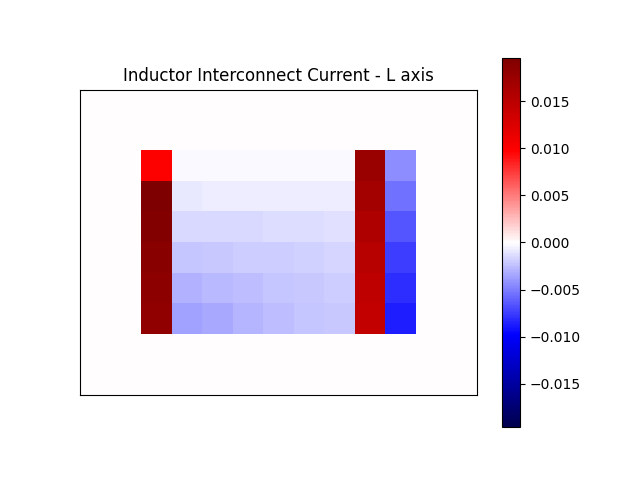

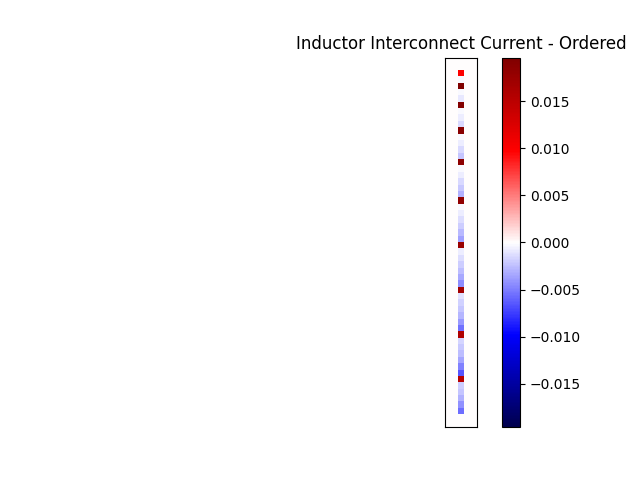

In [19]:

fig_zero, ax_zero = plt.subplots()
ax_zero.get_xaxis().set_ticks([])
ax_zero.get_yaxis().set_ticks([])

fig_1, ax_1 = plt.subplots()
ax_1.get_xaxis().set_ticks([])
ax_1.get_yaxis().set_ticks([])

fig_2, ax_2 = plt.subplots()
ax_2.get_xaxis().set_ticks([])
ax_2.get_yaxis().set_ticks([])

IL = data_output_merged.Current_Interconnect_Inductor
IL_new = MC.transform_merged_array_to_L_axis(data_input,IL)
IL_ordered = MC.get_image_array(data_output_ordered.Current_Interconnect_Inductor)

MC.plot_fanout_seismic(IL
                       ,ax_zero,"Inductor Interconnect Current - C axis",True,False,2)

MC.plot_fanout_seismic(IL_new[:,0:9]
                       ,ax_1,"Inductor Interconnect Current - L axis",True,False,2)

MC.plot_fanout_seismic(IL_ordered[:IL_new[:,0:9].size]
                       ,ax_2,"Inductor Interconnect Current - Ordered",True,False,2)


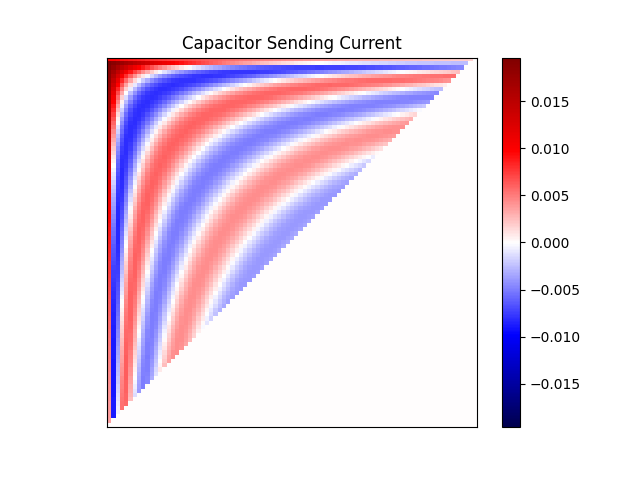

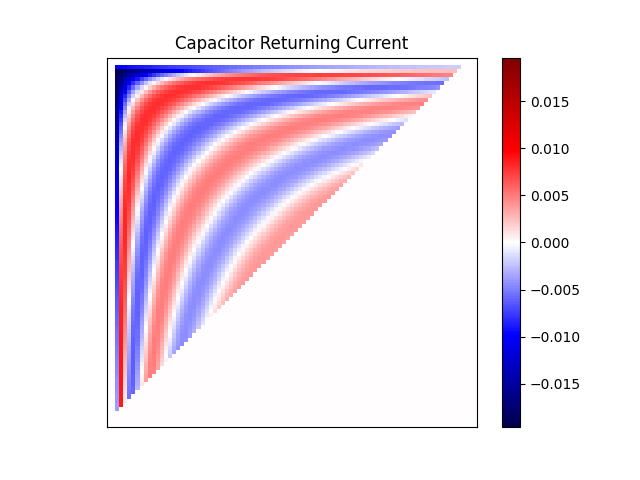

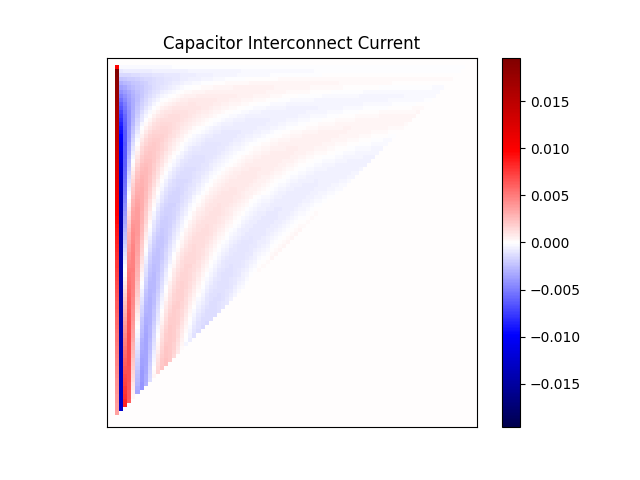

In [7]:
fig_0, ax_0 = plt.subplots()
fig_1, ax_1 = plt.subplots()
fig_zero, ax_zero = plt.subplots()

ax_0.get_xaxis().set_ticks([])
ax_0.get_yaxis().set_ticks([])

MC.plot_fanout_seismic(data_output.get_sending("Current capacitor")
                       ,ax_0,"Capacitor Sending Current",True,False,0)

ax_1.get_xaxis().set_ticks([])
ax_1.get_yaxis().set_ticks([])

MC.plot_fanout_seismic(data_output.get_returning("Current capacitor")
                       ,ax_1,"Capacitor Returning Current",True,False,2)
ax_zero.get_xaxis().set_ticks([])
ax_zero.get_yaxis().set_ticks([])

MC.plot_fanout_seismic(data_output.Current_Interconnect_Capacitor
                       ,ax_zero,"Capacitor Interconnect Current",True,False,2)

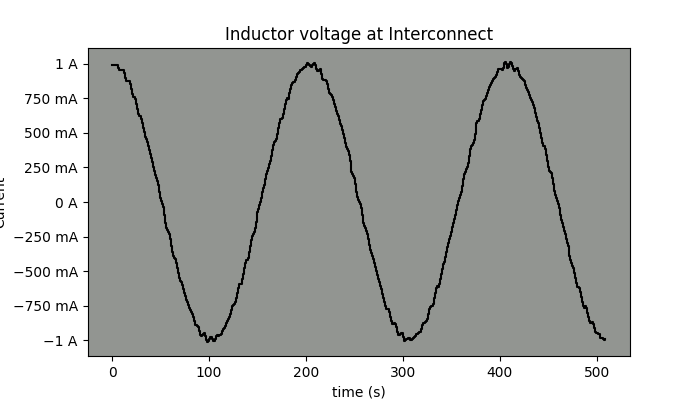

In [23]:
fig,ax = plt.subplots(figsize=(7, 4))
ax.set_facecolor('xkcd:grey')
MC.plot_time_interconnect(data_output_ordered,ax,'voltage inductor',True)
plt.gca().get_lines()[0].set_color("black")


# ax.set_ylim(0,0.4)
ax.set_xlabel('time (s)')
ax.set_ylabel('Current')
ax.yaxis.set_major_formatter(matplotlib.ticker.EngFormatter('A'))
# ax.set_xlim([0,24])
# ax.set_xticks(np.arange(0,24,1))
# ax.set_xticklabels([str(x) + 'mA' for x in np.arange(0,160,10)])
plt.savefig('figure.png', transparent=True)

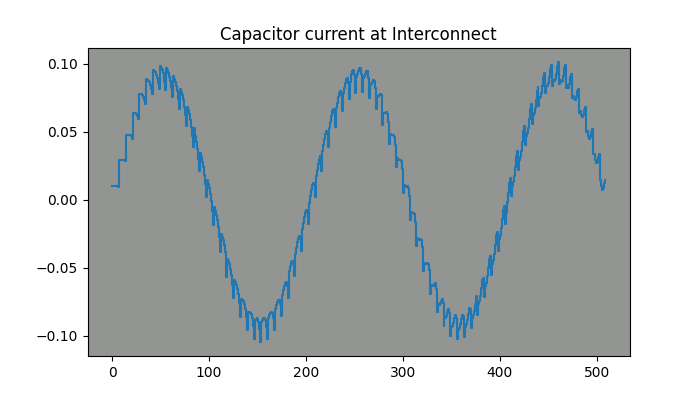

In [9]:
fig,ax = plt.subplots(figsize=(7, 4))
ax.set_facecolor('xkcd:grey')
MC.plot_time_interconnect(data_output_ordered,ax,'current capacitor',True)

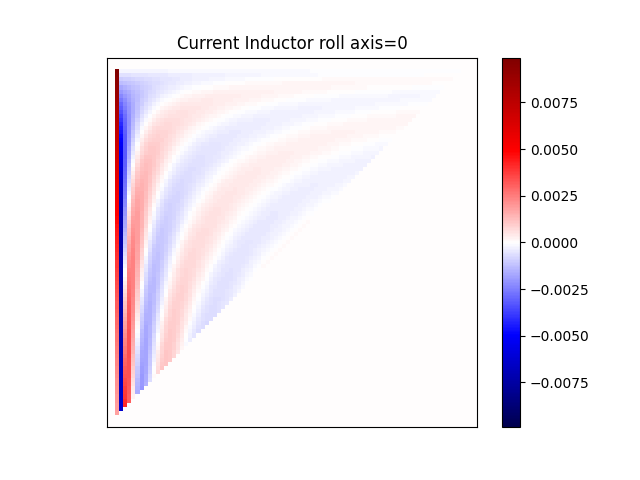

In [10]:
# RIGHT IS THE Inductor AXIS
# Down is the capacitor 
# ARRAY[L][C] => dimensions KLxKC

fig_one, ax_one = plt.subplots()

ax_one.get_xaxis().set_ticks([])
ax_one.get_yaxis().set_ticks([])

MC.plot_fanout_seismic((np.roll(data_output.get_returning("current inductor"),1,axis=0))
                       ,ax_one,"Current Inductor roll axis=0",True,False,2)


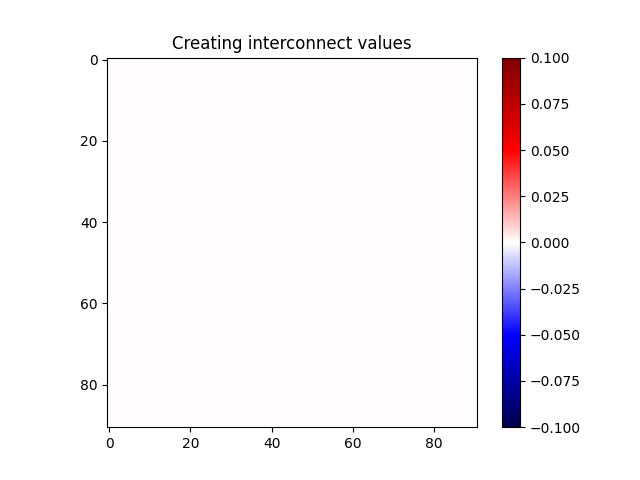

In [11]:
fig_two, ax_two = plt.subplots()
MC.plot_fanout_seismic(data_output.get_sending("current capacitor") +(np.roll(data_output.get_returning("current capacitor"),1)) - data_output.Current_Interconnect_Capacitor,
                       ax_two,"Creating interconnect values",True,False,2)

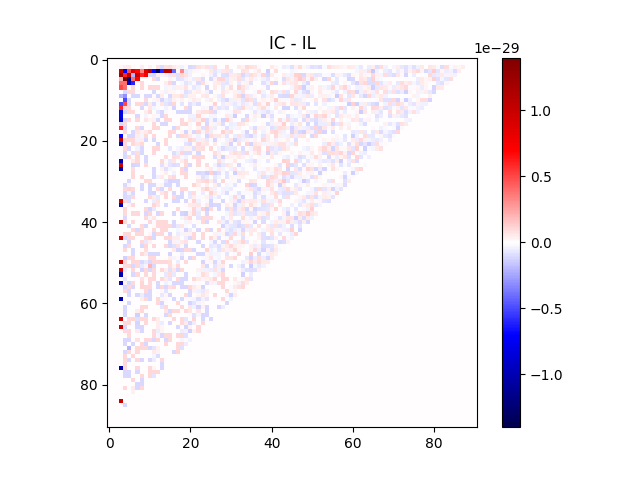

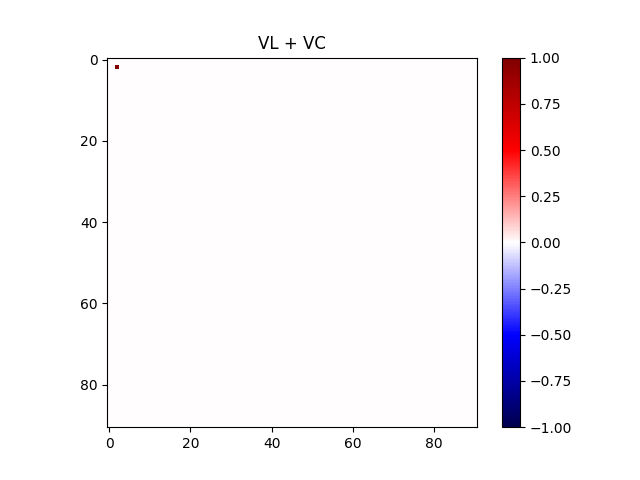

In [12]:
fig_three, ax_three = plt.subplots()
MC.plot_fanout_seismic(data_output.Current_Interconnect_Capacitor - data_output.Current_Interconnect_Inductor,
                       ax_three,"IC - IL",True,False,2)
fig_four, ax_four = plt.subplots()
MC.plot_fanout_seismic(data_output.Voltage_Interconnect_Capacitor + data_output.Voltage_Interconnect_Inductor,
                       ax_four,"VL + VC",True,False,2)

In [13]:
def mask_to_layer (input_array, max_layer):
    shape = input_array.shape
    
    mask = np.zeros(shape)
    
    total_ones = max_layer +2
    
    for i in range(max_layer+1):
        total_ones -= 1
        current_ones = total_ones
        for j in range(max_layer+1):
            if current_ones > 0:
                mask[i,j] = 1
                current_ones -=1
            else:
                break
            
    # masked_array =  np.ma.array(input_array, mask = mask)
    
    mask =  np.ma.array(mask)
    input_array =  np.ma.array(input_array)
    masked_array =  np.ma.masked_where(mask==0,input_array)
    masked_array = np.ma.filled(masked_array,Decimal('0'))
    masked_array = masked_array[:max_layer+1,:max_layer+1]
    return masked_array

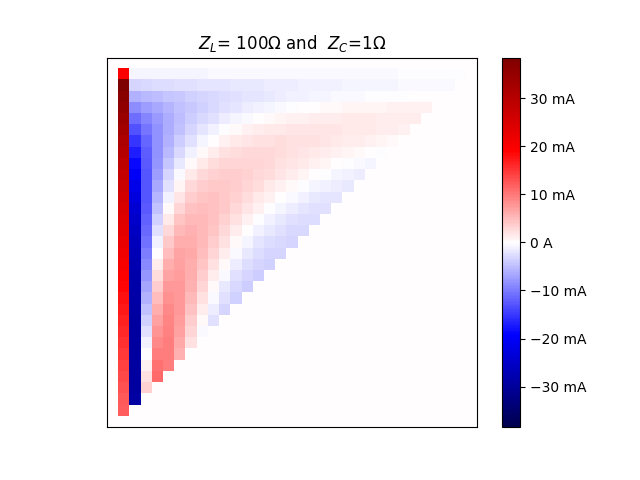

In [14]:
masked_VC = mask_to_layer(data_output_2.Current_Interconnect_Capacitor, 30)
# masked_VC = mask_to_layer(data_output_2.get_sending("voltage capacitor"), 8)

fig_masked, ax_masked = plt.subplots()
ax_masked.get_xaxis().set_ticks([])
ax_masked.get_yaxis().set_ticks([])
MC.plot_fanout_seismic(masked_VC,ax_masked,f"$Z_L$= {data_input.Inductor_Impedance}Ω and  $Z_C$={data_input.Capacitor_Impedance}Ω" ,True,False,1)

cb= ax_masked.images[-1].colorbar
cb.ax.yaxis.set_major_formatter(matplotlib.ticker.EngFormatter('A'))
plt.savefig('figure.png', transparent=True)

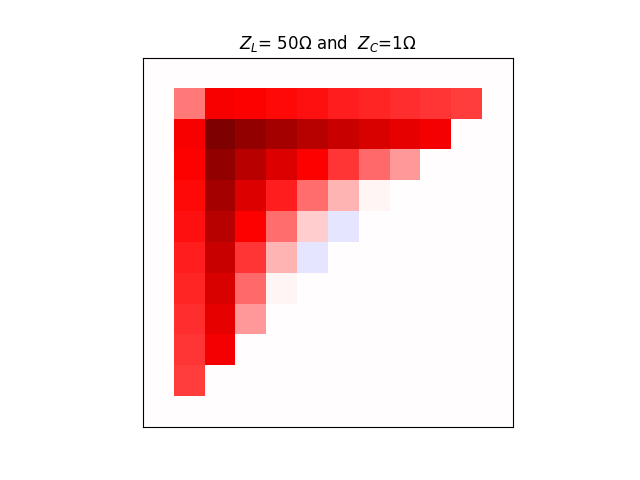

In [15]:
masked_VC_2 = mask_to_layer(data_output_2.Voltage_Interconnect_Capacitor, 9)

fig_masked_2, ax_masked_2 = plt.subplots()
ax_masked_2.get_xaxis().set_ticks([])
ax_masked_2.get_yaxis().set_ticks([])
MC.plot_fanout_seismic(masked_VC_2,ax_masked_2,f"$Z_L$= {data_input_2.Inductor_Impedance}Ω and  $Z_C$={data_input_2.Capacitor_Impedance}Ω" ,False,False,1)

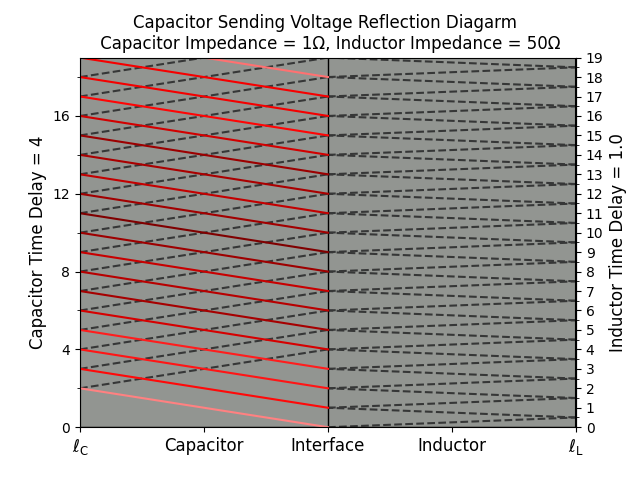

In [16]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

def plot_refelction_custom(Data_Input, Data_Output_Ordered , is_capacitor,is_sending,is_current, stop_time, ax, mutiple_ticks : bool = True):
    
        
    non_active_wavefront_colour = 'xkcd:dark grey'
    
    C_Time = str(2*Data_Input.Capacitor_Time)
    C_impedance = str(Data_Input.Capacitor_Impedance)
    
    L_Time = str(2*Data_Input.Inductor_Time)
    L_impedance = str(Data_Input.Inductor_Impedance)
    
    ax.axhline(linewidth=1, color='k')
    ax.axvline(linewidth=1, color='k')
    
    ax.plot([-1,-1],[0,stop_time],'k')
    ax.plot([1,1],[0,stop_time],'k')
    #ax.plot([-1,1],[stop_time,stop_time],'k')
    
    #ax.get_xaxis().set_visible(False)
    ax2 = ax.secondary_yaxis('right')
    ax.set_xticks = ([])
    ax2.set_xticks = ([])
    ax.set_xticklabels = ('')
    ax2.set_xticklabels = ('')
    
    ax.set_ylabel('Capacitor Time Delay = '+ C_Time, fontsize = 'large')
    ax2.set_ylabel('Inductor Time Delay = '+ L_Time, fontsize = 'large')
    #ax.yaxis.set_ticks(np.arange(0, stop_time, 1))
    #ax2.yaxis.set_ticks(np.arange(0, stop_time, 1))
    
    title_str =""
    
    if(is_capacitor):
        title_str += "Capacitor "
    else:
        title_str += "Inductor "
        
    if(is_sending):
        title_str += "Sending "
    else:
        title_str += "Returning "
        
    if(is_current):
        title_str += "Current "
    else:
        title_str += "Voltage "
    
    
    ax.set_title(title_str+'Reflection Diagarm \n Capacitor Impedance = '+ C_impedance +'Ω, Inductor Impedance = ' + L_impedance+ 'Ω', fontsize = 'large')
        
    # ax.set_xlabel('Relative distance down Transmission Line')
    
    if(mutiple_ticks):
        ax.yaxis.set_major_locator(MultipleLocator(float(C_Time)))
        ax2.yaxis.set_major_locator(MultipleLocator(float(L_Time)))
        #ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))

        # For the minor ticks, use no labels; default NullFormatter.
        ax.yaxis.set_minor_locator(MultipleLocator(float(C_Time)/2))
        ax2.yaxis.set_minor_locator(MultipleLocator(float(L_Time)/2))
    
    ax.set_ylim(0,stop_time)
    
    # Setup Colour Map
    max_cap_s = 0
    min_cap_s = 0
    max_ind_s = 0
    min_ind_s = 0
    
    max_cap_r = 0
    min_cap_r = 0
    max_ind_r = 0
    min_ind_r = 0
    
    boundary = 0 
    
    if(is_current):
        max_cap_s = abs(np.max(Data_Output_Ordered.get_sending("current capacitor")))
        min_cap_s = abs(np.min(Data_Output_Ordered.get_sending("current capacitor")))
        max_ind_s = abs(np.max(Data_Output_Ordered.get_sending("current inductor")))
        min_ind_s = abs(np.min(Data_Output_Ordered.get_sending("current inductor")))

        max_cap_r = abs(np.max(Data_Output_Ordered.get_returning("current capacitor")))
        min_cap_r = abs(np.min(Data_Output_Ordered.get_returning("current capacitor")))
        max_ind_r = abs(np.max(Data_Output_Ordered.get_returning("current inductor")))
        min_ind_r = abs(np.min(Data_Output_Ordered.get_returning("current inductor")))
    else:
        max_cap_s = abs(np.max(Data_Output_Ordered.get_sending("voltage capacitor")))
        min_cap_s = abs(np.min(Data_Output_Ordered.get_sending("voltage capacitor")))
        max_ind_s = abs(np.max(Data_Output_Ordered.get_sending("voltage inductor")))
        min_ind_s = abs(np.min(Data_Output_Ordered.get_sending("voltage inductor")))

        max_cap_r = abs(np.max(Data_Output_Ordered.get_returning("voltage capacitor")))
        min_cap_r = abs(np.min(Data_Output_Ordered.get_returning("voltage capacitor")))
        max_ind_r = abs(np.max(Data_Output_Ordered.get_returning("voltage inductor")))
        min_ind_r = abs(np.min(Data_Output_Ordered.get_returning("voltage inductor")))
        
    # boundary = max(max_cap_s,min_cap_s,max_ind_s,min_ind_s,max_cap_r,min_cap_r,max_ind_r,min_ind_r)
    boundary = max(max_cap_s,min_cap_s)
    
    colour_map = cm.seismic
    norm = mpl.colors.Normalize(vmin=-boundary, vmax=boundary)
    
    for wave in Data_Output_Ordered.Wavefronts_Returning_Capacitor:

        x1 = -wave.position_start
        x2 = -wave.position_end

        y1 = wave.time_start
        y2 = wave.time_end
        
        mag = 0
        
        if(is_current):
            mag = float(wave.magnitude_current)
        else:
            mag = float(wave.magnitude_voltage)

        if(wave.time_start <=stop_time):
            if(is_capacitor and not is_sending):
                ax.plot([x1,x2],[y1,y2],c=colour_map(norm(mag)),zorder=2)
            else:
                ax.plot([x1,x2],[y1,y2],c=non_active_wavefront_colour,linestyle='dashed',zorder=1)
            
    for wave in Data_Output_Ordered.Wavefronts_Sending_Capacitor:

        x1 = -wave.position_start
        x2 = -wave.position_end

        y1 = wave.time_start
        y2 = wave.time_end
        
        mag = 0
        
        if(is_current):
            mag = float(wave.magnitude_current)
        else:
            mag = float(wave.magnitude_voltage)

        if(wave.time_start <=stop_time):
            if(is_capacitor and is_sending):
                ax.plot([x1,x2],[y1,y2],c=colour_map(norm(mag)),zorder=2)
            else:
                ax.plot([x1,x2],[y1,y2],c=non_active_wavefront_colour,linestyle='dashed',zorder=1)

    # Inductor Wavefronts
    for wave in Data_Output_Ordered.Wavefronts_Returning_Inductor:

        x1 = wave.position_start
        x2 = wave.position_end

        y1 = wave.time_start
        y2 = wave.time_end

        mag = 0
        
        if(is_current):
            mag = float(wave.magnitude_current)
        else:
            mag = float(wave.magnitude_voltage)

        if(wave.time_start <=stop_time):
            if(not is_capacitor and not is_sending):
                ax.plot([x1,x2],[y1,y2],c=colour_map(norm(mag)),zorder=2)
            else:
                ax.plot([x1,x2],[y1,y2],c=non_active_wavefront_colour,linestyle='dashed',zorder=1)
            # ax.plot([(x2-x1)/2],[y1 + (y2-y1)/2], marker ='o',c=colour_map(norm(mag)),markersize=15)
            
    for wave in Data_Output_Ordered.Wavefronts_Sending_Inductor:

        x1 = wave.position_start
        x2 = wave.position_end

        y1 = wave.time_start
        y2 = wave.time_end

        mag = 0
        
        if(is_current):
            mag = float(wave.magnitude_current)
        else:
            mag = float(wave.magnitude_voltage)

        if(wave.time_start <=stop_time):
            if(not is_capacitor and is_sending):
                ax.plot([x1,x2],[y1,y2],c=colour_map(norm(mag)),zorder=2)  
            else:
                ax.plot([x1,x2],[y1,y2],c=non_active_wavefront_colour,linestyle='dashed',zorder=1)

fig_reflection, ax_reflection = plt.subplots()

ax_reflection.set_facecolor('xkcd:grey')
ax_reflection.set_xlim([-1,1])
ax_reflection.set_xticks([-1,-0.5,0,0.5,1])
ax_reflection.set_xticklabels(["$\mathregular{\ell_C}$","Capacitor","Interface","Inductor","$\mathregular{\ell_L}$"],fontsize='large')
# MC.plot_refelction_diagram_one_tx_s_or_r(data_input,data_output_ordered,True,True,False,19,ax_reflection,False)
plot_refelction_custom(data_input_2,data_output_ordered_2,True,True,False,19,ax_reflection,True)
plt.savefig('figure.png', transparent=True)

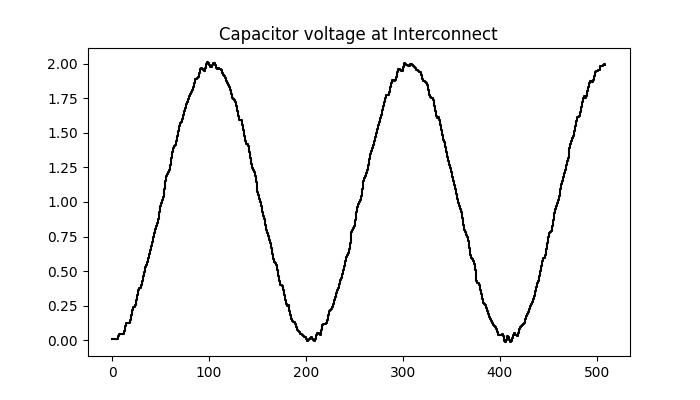

In [17]:
fig_time ,ax_time = plt.subplots(figsize=(7, 4))
ax.set_facecolor('xkcd:grey')
MC.plot_time_interconnect(data_output_ordered,ax_time,'voltage capacitor',True)
plt.gca().get_lines()[0].set_color("black")


# ax.set_ylim(0,0.4)
ax.set_xlabel('time (s)')
ax.set_ylabel('Current')
ax.yaxis.set_major_formatter(matplotlib.ticker.EngFormatter('A'))
ax.set_xlim([0,15])
ax.set_xticks(np.arange(0,16,1))
# ax.set_xticklabels([str(x) + 'mA' for x in np.arange(0,160,10)])